# Swish-based classifier with data augmentation and stochastic weight-averaging and cosine annealing with restarts
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 1
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Model uses a running average of previous weights and preiodically starts a new average alongside the nominal one and eventually compares it to the nominal to try and replace it.
- If the nominal average is replaced with the new one, then SGD continues for the old average.
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 18.788s 


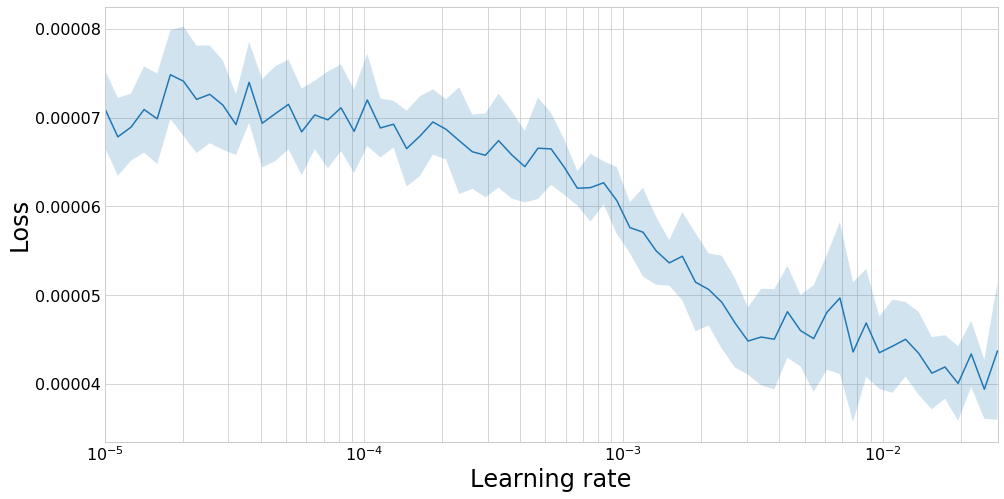

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113355). Check your callbacks.
  % delta_t_median)


1 New best found: 4.009244243547613e-05
2 New best found: 3.706702922366772e-05
3 New best found: 3.6199266870328506e-05
4 New best found: 3.5745342083884674e-05
5 New best found: 3.54357423660408e-05
6 New best found: 3.528006460938324e-05
7 New best found: 3.4952279868934593e-05
8 New best found: 3.48126567226394e-05
9 New best found: 3.468159726622723e-05
10 New best found: 3.468138137559169e-05
12 New best found: 3.449948021642185e-05
13 New best found: 3.430140827625992e-05
14 New best found: 3.4220138581220603e-05
16 New best found: 3.3942704852281875e-05
17 New best found: 3.391369733816979e-05
18 New best found: 3.375342616293382e-05
23 New best found: 3.3682655114451185e-05
27 New best found: 3.363265661271079e-05
30 New best found: 3.347092463815109e-05
32 New best found: 3.346845294066938e-05
34 New best found: 3.331414681846108e-05
35 New best found: 3.328027558558653e-05
38 New best found: 3.3232023548773984e-05
42 New best found: 3.32173592780254e-05
43 New best found: 3.

model is 23 epochs old
new model is 2 epochs old
94 swa loss 3.248991882315123e-05, default loss 3.278637627260514e-05
94 New best found: 3.248991882315123e-05
model is 24 epochs old
new model is 3 epochs old
95 swa loss 3.248220236699617e-05, default loss 3.288515029749346e-05
95 New best found: 3.248220236699617e-05
model is 25 epochs old
new model is 4 epochs old
96 swa loss 3.247570480288536e-05, default loss 3.2780251146327904e-05
96 New best found: 3.247570480288536e-05
model is 26 epochs old
new model is 5 epochs old
97 swa loss 3.2467821869976154e-05, default loss 3.2788152924258765e-05
97 New best found: 3.2467821869976154e-05
model is 27 epochs old
new model is 6 epochs old
98 swa loss 3.2460090703685676e-05, default loss 3.2597529120290686e-05
98 New best found: 3.2460090703685676e-05
model is 28 epochs old
new model is 7 epochs old
99 swa loss 3.2450375405276075e-05, default loss 3.2562660784716696e-05
99 New best found: 3.2450375405276075e-05
model is 29 epochs old
new mod

model is 53 epochs old
new model is 7 epochs old
145 swa loss 3.2327449657157575e-05, default loss 3.250987011438977e-05
145 New best found: 3.2327449657157575e-05
model is 54 epochs old
new model is 8 epochs old
146 swa loss 3.2324102787273956e-05, default loss 3.2603136838128616e-05
146 New best found: 3.2324102787273956e-05
model is 55 epochs old
new model is 9 epochs old
147 swa loss 3.232289434696413e-05, default loss 3.272712464203674e-05
147 New best found: 3.232289434696413e-05
model is 56 epochs old
new model is 10 epochs old
148 swa loss 3.232365584662158e-05, default loss 3.269498591353334e-05
model is 57 epochs old
new model is 11 epochs old
149 swa loss 3.2323674777385107e-05, default loss 3.2780857079264976e-05
model is 58 epochs old
new model is 12 epochs old
150 swa loss 3.232397318876901e-05, default loss 3.279025386917593e-05
model is 59 epochs old
new model is 13 epochs old
151 swa loss 3.232012735808489e-05, default loss 3.241586305562414e-05
151 New best found: 3.2

197 swa loss 3.2213638086769205e-05, default loss 3.236710631750432e-05
197 New best found: 3.2213638086769205e-05
model is 60 epochs old
new model is 9 epochs old
198 swa loss 3.221190023399278e-05, default loss 3.252051376506643e-05
198 New best found: 3.221190023399278e-05
model is 61 epochs old
new model is 10 epochs old
199 swa loss 3.2209044959860395e-05, default loss 3.2393160736884496e-05
199 New best found: 3.2209044959860395e-05
model is 62 epochs old
new model is 11 epochs old
200 swa loss 3.2207730913720605e-05, default loss 3.2664944557342583e-05
200 New best found: 3.2207730913720605e-05
model is 63 epochs old
new model is 12 epochs old
201 swa loss 3.220770203407569e-05, default loss 3.262075569371957e-05
201 New best found: 3.220770203407569e-05
model is 64 epochs old
new model is 13 epochs old
202 swa loss 3.2206686359115216e-05, default loss 3.272133933435704e-05
202 New best found: 3.2206686359115216e-05
model is 65 epochs old
new model is 14 epochs old
203 swa loss 

model is 20 epochs old
new model is 4 epochs old
245 swa loss 3.20655532886464e-05, default loss 3.2403117544315286e-05
245 New best found: 3.20655532886464e-05
model is 21 epochs old
new model is 5 epochs old
Checking renewal swa model, current model: 3.206955325500028e-05, new model: 3.208674889220552e-05
Current model better, renewing
____________________


246 swa loss 3.206955325500028e-05, default loss 3.262162906398397e-05
model is 22 epochs old
new model is 1 epochs old
247 swa loss 3.207332947439288e-05, default loss 3.270499701164195e-05
model is 23 epochs old
new model is 2 epochs old
248 swa loss 3.207687547059547e-05, default loss 3.251639141097032e-05
model is 24 epochs old
new model is 3 epochs old
249 swa loss 3.208416446634371e-05, default loss 3.269067596466616e-05
model is 25 epochs old
new model is 4 epochs old
250 swa loss 3.208115063862691e-05, default loss 3.2435364094547104e-05
model is 26 epochs old
new model is 5 epochs old
251 swa loss 3.207745526350432e-05, 

296 swa loss 3.1987601262884266e-05, default loss 3.237994825622127e-05
296 New best found: 3.1987601262884266e-05
model is 26 epochs old
new model is 5 epochs old
Checking renewal swa model, current model: 3.1988795419840467e-05, new model: 3.205161812990835e-05
Current model better, renewing
____________________


297 swa loss 3.1988795419840467e-05, default loss 3.2487013798546665e-05
model is 27 epochs old
new model is 1 epochs old
298 swa loss 3.1990758465165406e-05, default loss 3.250512983822538e-05
model is 28 epochs old
new model is 2 epochs old
299 swa loss 3.19897672678621e-05, default loss 3.241009338069061e-05
model is 29 epochs old
new model is 3 epochs old
300 swa loss 3.199069317330815e-05, default loss 3.2405274135290876e-05
model is 30 epochs old
new model is 4 epochs old
301 swa loss 3.1992090627923644e-05, default loss 3.2418626636977585e-05
model is 31 epochs old
new model is 5 epochs old
302 swa loss 3.199365080160614e-05, default loss 3.244676940571643e-05
model 

model is 78 epochs old
new model is 7 epochs old
349 swa loss 3.1935049816475596e-05, default loss 3.232589819249505e-05
349 New best found: 3.1935049816475596e-05
model is 79 epochs old
new model is 8 epochs old
350 swa loss 3.19336570163122e-05, default loss 3.2258340488232324e-05
350 New best found: 3.19336570163122e-05
model is 80 epochs old
new model is 9 epochs old
351 swa loss 3.1932392509520836e-05, default loss 3.23694155703511e-05
351 New best found: 3.1932392509520836e-05
model is 81 epochs old
new model is 10 epochs old
352 swa loss 3.193140305511064e-05, default loss 3.2420431790017096e-05
352 New best found: 3.193140305511064e-05
model is 82 epochs old
new model is 11 epochs old
353 swa loss 3.193079625260652e-05, default loss 3.24204964496827e-05
353 New best found: 3.193079625260652e-05
model is 83 epochs old
new model is 12 epochs old
354 swa loss 3.1929755652634614e-05, default loss 3.235307810694989e-05
354 New best found: 3.1929755652634614e-05
model is 84 epochs ol

405 swa loss 3.192182746828799e-05, default loss 3.230498223855083e-05
model is 135 epochs old
new model is 9 epochs old
406 swa loss 3.192206915748385e-05, default loss 3.2469357971228205e-05
model is 136 epochs old
new model is 10 epochs old
407 swa loss 3.1921579373734625e-05, default loss 3.248352939791481e-05
model is 137 epochs old
new model is 11 epochs old
408 swa loss 3.192152947522631e-05, default loss 3.2461555846182084e-05
model is 138 epochs old
new model is 12 epochs old
409 swa loss 3.19224645530636e-05, default loss 3.242328416423365e-05
model is 139 epochs old
new model is 13 epochs old
410 swa loss 3.192239011527298e-05, default loss 3.2376803708488064e-05
model is 140 epochs old
new model is 14 epochs old
411 swa loss 3.192193500591556e-05, default loss 3.223405136522913e-05
model is 141 epochs old
new model is 15 epochs old
412 swa loss 3.192118330310055e-05, default loss 3.2298786653956854e-05
model is 142 epochs old
new model is 16 epochs old
413 swa loss 3.192113

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240414). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120637). Check your callbacks.
  % delta_t_median)


1 New best found: 4.046442241465997e-05
2 New best found: 3.7351680473721514e-05
3 New best found: 3.6014980221119156e-05
4 New best found: 3.5490973928103415e-05
5 New best found: 3.48809525303883e-05
6 New best found: 3.471441603782961e-05
7 New best found: 3.453738357682178e-05
8 New best found: 3.4331606393454087e-05
10 New best found: 3.4100077154143306e-05
12 New best found: 3.367303031886295e-05
16 New best found: 3.3603045771312545e-05
17 New best found: 3.359380798063985e-05
21 New best found: 3.3301227722087123e-05
25 New best found: 3.328245041089377e-05
28 New best found: 3.324765398649995e-05
29 New best found: 3.3162352133921304e-05
32 New best found: 3.301110345792164e-05
39 New best found: 3.298882650492413e-05
41 New best found: 3.287769423959681e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.2830063414810853e-05, default loss 3.2830063414810853e-05
50 New best found: 3.2830063414810853e-05
model is 1 epochs old
51 swa loss 3.27283661007943e-05, default loss 3.2

94 swa loss 3.234298309708983e-05, default loss 3.260080191697761e-05
94 New best found: 3.234298309708983e-05
model is 35 epochs old
new model is 9 epochs old
95 swa loss 3.2336917927243917e-05, default loss 3.254702113628974e-05
95 New best found: 3.2336917927243917e-05
model is 36 epochs old
new model is 10 epochs old
96 swa loss 3.233148522419595e-05, default loss 3.253687691567391e-05
96 New best found: 3.233148522419595e-05
model is 37 epochs old
new model is 11 epochs old
97 swa loss 3.232755347307813e-05, default loss 3.259324459415128e-05
97 New best found: 3.232755347307813e-05
model is 38 epochs old
new model is 12 epochs old
98 swa loss 3.2322518571435996e-05, default loss 3.2513100931080996e-05
98 New best found: 3.2322518571435996e-05
model is 39 epochs old
new model is 13 epochs old
99 swa loss 3.2318081468424134e-05, default loss 3.255023606826284e-05
99 New best found: 3.2318081468424134e-05
model is 40 epochs old
new model is 14 epochs old
100 swa loss 3.2317472234345

model is 27 epochs old
new model is 6 epochs old
144 swa loss 3.2185661159397004e-05, default loss 3.2510923244361745e-05
144 New best found: 3.2185661159397004e-05
model is 28 epochs old
new model is 7 epochs old
145 swa loss 3.2182182738523435e-05, default loss 3.257738583401581e-05
145 New best found: 3.2182182738523435e-05
model is 29 epochs old
new model is 8 epochs old
146 swa loss 3.2178491792240784e-05, default loss 3.2486398347496557e-05
146 New best found: 3.2178491792240784e-05
model is 30 epochs old
new model is 9 epochs old
147 swa loss 3.2175762858643025e-05, default loss 3.253138877447099e-05
147 New best found: 3.2175762858643025e-05
model is 31 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.217636943115489e-05, new model: 3.22077928325439e-05
Current model better, renewing
____________________


148 swa loss 3.217636943115489e-05, default loss 3.263732258366365e-05
model is 32 epochs old
new model is 1 epochs old
149 swa loss 3.21744

model is 32 epochs old
new model is 6 epochs old
195 swa loss 3.2078807965388564e-05, default loss 3.259821420901664e-05
model is 33 epochs old
new model is 7 epochs old
196 swa loss 3.20756074083135e-05, default loss 3.241843523853025e-05
196 New best found: 3.20756074083135e-05
model is 34 epochs old
new model is 8 epochs old
197 swa loss 3.20759658921431e-05, default loss 3.252409765910629e-05
model is 35 epochs old
new model is 9 epochs old
198 swa loss 3.20759865355109e-05, default loss 3.253672058457781e-05
model is 36 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.2074815991793264e-05, new model: 3.212548417482745e-05
Current model better, renewing
____________________


199 swa loss 3.2074815991793264e-05, default loss 3.248630419787917e-05
199 New best found: 3.2074815991793264e-05
model is 37 epochs old
new model is 1 epochs old
200 swa loss 3.207577533207154e-05, default loss 3.2422367192203735e-05
model is 38 epochs old
new model is 2 epo

model is 35 epochs old
new model is 9 epochs old
249 swa loss 3.201845790780917e-05, default loss 3.246620296558838e-05
model is 36 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.201515845655135e-05, new model: 3.208289186842395e-05
Current model better, renewing
____________________


250 swa loss 3.201515845655135e-05, default loss 3.2284740538892846e-05
model is 37 epochs old
new model is 1 epochs old
251 swa loss 3.2014212644803555e-05, default loss 3.241349732731086e-05
251 New best found: 3.2014212644803555e-05
model is 38 epochs old
new model is 2 epochs old
252 swa loss 3.201559265440523e-05, default loss 3.242825390618957e-05
model is 39 epochs old
new model is 3 epochs old
253 swa loss 3.2013385946689294e-05, default loss 3.233580715465404e-05
253 New best found: 3.2013385946689294e-05
model is 40 epochs old
new model is 4 epochs old
254 swa loss 3.201204931338798e-05, default loss 3.2346655234153466e-05
254 New best found: 3.20120493133879

model is 91 epochs old
new model is 20 epochs old
305 swa loss 3.198225273425032e-05, default loss 3.2411021082430776e-05
305 New best found: 3.198225273425032e-05
model is 92 epochs old
new model is 21 epochs old
306 swa loss 3.198342544176083e-05, default loss 3.2653229799129724e-05
model is 93 epochs old
new model is 22 epochs old
307 swa loss 3.1982462738148885e-05, default loss 3.229223662999463e-05
model is 94 epochs old
new model is 23 epochs old
308 swa loss 3.198181702305161e-05, default loss 3.227850141850527e-05
308 New best found: 3.198181702305161e-05
model is 95 epochs old
new model is 24 epochs old
309 swa loss 3.198027965504069e-05, default loss 3.2277079634929154e-05
309 New best found: 3.198027965504069e-05
model is 96 epochs old
new model is 25 epochs old
Checking renewal swa model, current model: 3.1981426874192106e-05, new model: 3.202695607234983e-05
Current model better, renewing
____________________


310 swa loss 3.1981426874192106e-05, default loss 3.262167809

363 swa loss 3.197075351479324e-05, default loss 3.225283269816747e-05
363 New best found: 3.197075351479324e-05
model is 150 epochs old
new model is 24 epochs old
364 swa loss 3.1971137586168745e-05, default loss 3.2520320007569705e-05
model is 151 epochs old
new model is 25 epochs old
365 swa loss 3.1970139181429586e-05, default loss 3.219969702866279e-05
365 New best found: 3.1970139181429586e-05
model is 152 epochs old
new model is 26 epochs old
366 swa loss 3.197018954896885e-05, default loss 3.247353603404852e-05
model is 153 epochs old
new model is 27 epochs old
367 swa loss 3.1969914795024865e-05, default loss 3.2277778002731665e-05
367 New best found: 3.1969914795024865e-05
model is 154 epochs old
new model is 28 epochs old
368 swa loss 3.1969815988275706e-05, default loss 3.2381050011650475e-05
368 New best found: 3.1969815988275706e-05
model is 155 epochs old
new model is 29 epochs old
369 swa loss 3.1968833013250755e-05, default loss 3.237133602082939e-05
369 New best found

model is 206 epochs old
new model is 5 epochs old
420 swa loss 3.1960507489634916e-05, default loss 3.265199957365689e-05
model is 207 epochs old
new model is 6 epochs old
421 swa loss 3.1960485147792523e-05, default loss 3.244220507409607e-05
model is 208 epochs old
new model is 7 epochs old
422 swa loss 3.196032111671734e-05, default loss 3.2427621465901364e-05
model is 209 epochs old
new model is 8 epochs old
423 swa loss 3.196054200123096e-05, default loss 3.256711001622155e-05
model is 210 epochs old
new model is 9 epochs old
424 swa loss 3.196057431579518e-05, default loss 3.253505984744492e-05
model is 211 epochs old
new model is 10 epochs old
425 swa loss 3.19601219728007e-05, default loss 3.231743088848115e-05
model is 212 epochs old
new model is 11 epochs old
426 swa loss 3.195957046621617e-05, default loss 3.231404529096663e-05
426 New best found: 3.195957046621617e-05
model is 213 epochs old
new model is 12 epochs old
427 swa loss 3.1960081835479615e-05, default loss 3.2643

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.321213). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160954). Check your callbacks.
  % delta_t_median)


1 New best found: 4.062822961927248e-05
2 New best found: 3.7661289070205595e-05
3 New best found: 3.6943958823454995e-05
4 New best found: 3.628915030351782e-05
5 New best found: 3.6020306673009745e-05
6 New best found: 3.5618863648973325e-05
8 New best found: 3.52416409178743e-05
9 New best found: 3.496971672375217e-05
11 New best found: 3.489848013864178e-05
12 New best found: 3.4678630479395426e-05
13 New best found: 3.43379582663354e-05
16 New best found: 3.414946370895852e-05
17 New best found: 3.410941841416855e-05
19 New best found: 3.4016523768729534e-05
21 New best found: 3.398440479041211e-05
22 New best found: 3.381292759761862e-05
26 New best found: 3.379361093400017e-05
27 New best found: 3.367037347973553e-05
30 New best found: 3.354584427150743e-05
31 New best found: 3.350734827698931e-05
33 New best found: 3.345762851417667e-05
34 New best found: 3.34111343622534e-05
35 New best found: 3.341085738631891e-05
36 New best found: 3.338931680253527e-05
37 New best found: 3.

model is 32 epochs old
new model is 6 epochs old
92 swa loss 3.25920145465589e-05, default loss 3.2953320362603905e-05
92 New best found: 3.25920145465589e-05
model is 33 epochs old
new model is 7 epochs old
93 swa loss 3.259294203504335e-05, default loss 3.313019288521154e-05
model is 34 epochs old
new model is 8 epochs old
94 swa loss 3.2594362843471055e-05, default loss 3.305348473294078e-05
model is 35 epochs old
new model is 9 epochs old
95 swa loss 3.259210693269171e-05, default loss 3.2835095603690986e-05
model is 36 epochs old
new model is 10 epochs old
96 swa loss 3.258580710736669e-05, default loss 3.280798445440705e-05
96 New best found: 3.258580710736669e-05
model is 37 epochs old
new model is 11 epochs old
97 swa loss 3.2582861493525416e-05, default loss 3.292105843021976e-05
97 New best found: 3.2582861493525416e-05
model is 38 epochs old
new model is 12 epochs old
98 swa loss 3.257925782433564e-05, default loss 3.288138915561255e-05
98 New best found: 3.257925782433564e-

model is 26 epochs old
new model is 5 epochs old
143 swa loss 3.2420207296094784e-05, default loss 3.267697294014814e-05
143 New best found: 3.2420207296094784e-05
model is 27 epochs old
new model is 6 epochs old
144 swa loss 3.241540520143358e-05, default loss 3.270710711206763e-05
144 New best found: 3.241540520143358e-05
model is 28 epochs old
new model is 7 epochs old
145 swa loss 3.241066021608292e-05, default loss 3.260452264449256e-05
145 New best found: 3.241066021608292e-05
model is 29 epochs old
new model is 8 epochs old
146 swa loss 3.240920388828853e-05, default loss 3.281519185401172e-05
146 New best found: 3.240920388828853e-05
model is 30 epochs old
new model is 9 epochs old
147 swa loss 3.240978336579977e-05, default loss 3.3028160135204694e-05
model is 31 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.240836187113862e-05, new model: 3.242734575399757e-05
Current model better, renewing
____________________


148 swa loss 3.24083618711

model is 45 epochs old
new model is 14 epochs old
193 swa loss 3.230734774344028e-05, default loss 3.2493599449023916e-05
193 New best found: 3.230734774344028e-05
model is 46 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.2303435480770726e-05, new model: 3.226235011008678e-05
New model better, replacing
____________________


Old average better than current point, starting SGD from old average
194 swa loss 3.226235011008678e-05, default loss 3.256399336573384e-05
194 New best found: 3.226235011008678e-05
model is 16 epochs old
new model is 0 epochs old
195 swa loss 3.22571477662144e-05, default loss 3.269265514452232e-05
195 New best found: 3.22571477662144e-05
model is 17 epochs old
new model is 1 epochs old
196 swa loss 3.225958673416885e-05, default loss 3.266347376562822e-05
model is 18 epochs old
new model is 2 epochs old
197 swa loss 3.2263040373332484e-05, default loss 3.270720953846309e-05
model is 19 epochs old
new model is 3 epochs old
198

model is 70 epochs old
new model is 4 epochs old
249 swa loss 3.222728611691231e-05, default loss 3.252917119835219e-05
249 New best found: 3.222728611691231e-05
model is 71 epochs old
new model is 5 epochs old
250 swa loss 3.222674671392611e-05, default loss 3.262018511434424e-05
250 New best found: 3.222674671392611e-05
model is 72 epochs old
new model is 6 epochs old
251 swa loss 3.222494880798848e-05, default loss 3.24064219530725e-05
251 New best found: 3.222494880798848e-05
model is 73 epochs old
new model is 7 epochs old
252 swa loss 3.222188578653385e-05, default loss 3.2476857167138686e-05
252 New best found: 3.222188578653385e-05
model is 74 epochs old
new model is 8 epochs old
253 swa loss 3.221967696055577e-05, default loss 3.238116223022789e-05
253 New best found: 3.221967696055577e-05
model is 75 epochs old
new model is 9 epochs old
254 swa loss 3.221706205550423e-05, default loss 3.249272584320942e-05
254 New best found: 3.221706205550423e-05
model is 76 epochs old
new m

model is 57 epochs old
new model is 1 epochs old
302 swa loss 3.2115647740542417e-05, default loss 3.2404380104276386e-05
302 New best found: 3.2115647740542417e-05
model is 58 epochs old
new model is 2 epochs old
303 swa loss 3.211131204704525e-05, default loss 3.2236819826679065e-05
303 New best found: 3.211131204704525e-05
model is 59 epochs old
new model is 3 epochs old
304 swa loss 3.2109656363233615e-05, default loss 3.247142265040454e-05
304 New best found: 3.2109656363233615e-05
model is 60 epochs old
new model is 4 epochs old
305 swa loss 3.210391845900834e-05, default loss 3.223493240388684e-05
305 New best found: 3.210391845900834e-05
model is 61 epochs old
new model is 5 epochs old
306 swa loss 3.2099808025814185e-05, default loss 3.234817069632616e-05
306 New best found: 3.2099808025814185e-05
model is 62 epochs old
new model is 6 epochs old
307 swa loss 3.2096567626973405e-05, default loss 3.223776749020617e-05
307 New best found: 3.2096567626973405e-05
model is 63 epochs

356 swa loss 3.201357202327137e-05, default loss 3.255467333184791e-05
model is 56 epochs old
new model is 5 epochs old
357 swa loss 3.20110982933225e-05, default loss 3.232060530562363e-05
model is 57 epochs old
new model is 6 epochs old
358 swa loss 3.2013038285846925e-05, default loss 3.248429341987741e-05
model is 58 epochs old
new model is 7 epochs old
359 swa loss 3.2010382129977346e-05, default loss 3.226316680592211e-05
model is 59 epochs old
new model is 8 epochs old
360 swa loss 3.2011515090405755e-05, default loss 3.2576486351255867e-05
model is 60 epochs old
new model is 9 epochs old
361 swa loss 3.2010458719136196e-05, default loss 3.2324991249666514e-05
model is 61 epochs old
new model is 10 epochs old
362 swa loss 3.201416330094319e-05, default loss 3.272449011918358e-05
model is 62 epochs old
new model is 11 epochs old
363 swa loss 3.2016599358165596e-05, default loss 3.2745012263946835e-05
model is 63 epochs old
new model is 12 epochs old
364 swa loss 3.201622672978297

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.338696). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169778). Check your callbacks.
  % delta_t_median)


1 New best found: 4.130770624615252e-05
2 New best found: 3.6484758323058487e-05
3 New best found: 3.545571829454275e-05
4 New best found: 3.486681409849553e-05
5 New best found: 3.4548456357151736e-05
6 New best found: 3.4412344136217145e-05
7 New best found: 3.401191424491117e-05
8 New best found: 3.367078636947554e-05
10 New best found: 3.3353501830424645e-05
12 New best found: 3.319238003168721e-05
14 New best found: 3.3087425147823525e-05
16 New best found: 3.301247167401016e-05
17 New best found: 3.282478023320436e-05
19 New best found: 3.264178411773173e-05
25 New best found: 3.2423366367584095e-05
30 New best found: 3.238006251049228e-05
34 New best found: 3.230720678693615e-05
35 New best found: 3.226585543161491e-05
37 New best found: 3.210983777680667e-05
43 New best found: 3.2080640252388546e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.213016684167087e-05, default loss 3.213016684167087e-05
model is 1 epochs old
51 swa loss 3.2008376411977226e-05, default loss 3.21

model is 28 epochs old
new model is 7 epochs old
98 swa loss 3.1601079195388594e-05, default loss 3.1799530345597304e-05
model is 29 epochs old
new model is 8 epochs old
99 swa loss 3.160506464482751e-05, default loss 3.2153225639194715e-05
model is 30 epochs old
new model is 9 epochs old
100 swa loss 3.159579581406433e-05, default loss 3.168340829870431e-05
model is 31 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.1594436307204886e-05, new model: 3.161702068755403e-05
Current model better, renewing
____________________


101 swa loss 3.1594436307204886e-05, default loss 3.192339776796871e-05
model is 32 epochs old
new model is 1 epochs old
102 swa loss 3.1590529634559064e-05, default loss 3.188925108624971e-05
model is 33 epochs old
new model is 2 epochs old
103 swa loss 3.158827355218818e-05, default loss 3.201860817207489e-05
103 New best found: 3.158827355218818e-05
model is 34 epochs old
new model is 3 epochs old
104 swa loss 3.158912921353476e

148 swa loss 3.1418411274353274e-05, default loss 3.159862833854277e-05
148 New best found: 3.1418411274353274e-05
model is 17 epochs old
new model is 1 epochs old
149 swa loss 3.142539927212056e-05, default loss 3.1999733934208055e-05
model is 18 epochs old
new model is 2 epochs old
150 swa loss 3.143274786780239e-05, default loss 3.1828096004028336e-05
model is 19 epochs old
new model is 3 epochs old
151 swa loss 3.142840387590695e-05, default loss 3.1712703505036185e-05
model is 20 epochs old
new model is 4 epochs old
152 swa loss 3.1417061114916575e-05, default loss 3.169563656410901e-05
152 New best found: 3.1417061114916575e-05
model is 21 epochs old
new model is 5 epochs old
Checking renewal swa model, current model: 3.1417246483761117e-05, new model: 3.147671559490846e-05
Current model better, renewing
____________________


153 swa loss 3.1417246483761117e-05, default loss 3.178143457334954e-05
model is 22 epochs old
new model is 1 epochs old
154 swa loss 3.141162942847586e-05

model is 40 epochs old
new model is 9 epochs old
203 swa loss 3.135797293143696e-05, default loss 3.1887301302776906e-05
model is 41 epochs old
new model is 10 epochs old
204 swa loss 3.1358927981636955e-05, default loss 3.180513007246191e-05
model is 42 epochs old
new model is 11 epochs old
205 swa loss 3.135774931361084e-05, default loss 3.173367886338383e-05
model is 43 epochs old
new model is 12 epochs old
206 swa loss 3.135131025774172e-05, default loss 3.162827551641385e-05
model is 44 epochs old
new model is 13 epochs old
207 swa loss 3.134820032137213e-05, default loss 3.164330513391178e-05
207 New best found: 3.134820032137213e-05
model is 45 epochs old
new model is 14 epochs old
208 swa loss 3.133995434327517e-05, default loss 3.142812853038777e-05
208 New best found: 3.133995434327517e-05
model is 46 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.133813141612336e-05, new model: 3.1365788497350876e-05
Current model better, renewing
________

256 swa loss 3.123057002085261e-05, default loss 3.1500470679748107e-05
model is 48 epochs old
new model is 12 epochs old
257 swa loss 3.123252577934181e-05, default loss 3.172880376077956e-05
model is 49 epochs old
new model is 13 epochs old
258 swa loss 3.1233807897660884e-05, default loss 3.173050768236863e-05
model is 50 epochs old
new model is 14 epochs old
259 swa loss 3.12324422338861e-05, default loss 3.1591777293215276e-05
model is 51 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.1230022183444816e-05, new model: 3.127797046035994e-05
Current model better, renewing
____________________


260 swa loss 3.1230022183444816e-05, default loss 3.1469656903936994e-05
model is 52 epochs old
new model is 1 epochs old
261 swa loss 3.122969320393168e-05, default loss 3.164006815932226e-05
model is 53 epochs old
new model is 2 epochs old
262 swa loss 3.1227978536480805e-05, default loss 3.1643080888898114e-05
262 New best found: 3.1227978536480805e-05
mo

model is 36 epochs old
new model is 5 epochs old
316 swa loss 3.120477768970886e-05, default loss 3.1411311895499236e-05
model is 37 epochs old
new model is 6 epochs old
317 swa loss 3.1205458528711464e-05, default loss 3.1610935951175636e-05
model is 38 epochs old
new model is 7 epochs old
318 swa loss 3.1205125819542444e-05, default loss 3.160657858388731e-05
model is 39 epochs old
new model is 8 epochs old
319 swa loss 3.1203990809444804e-05, default loss 3.177638533525169e-05
model is 40 epochs old
new model is 9 epochs old
320 swa loss 3.1207657206687144e-05, default loss 3.1724242576456165e-05
model is 41 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.121235166472616e-05, new model: 3.128701352397911e-05
Current model better, renewing
____________________


321 swa loss 3.121235166472616e-05, default loss 3.182399472862016e-05
model is 42 epochs old
new model is 1 epochs old
322 swa loss 3.1210708881553725e-05, default loss 3.1438353285193444e-

377 swa loss 3.119887540378841e-05, default loss 3.161097194533795e-05
model is 98 epochs old
new model is 22 epochs old
378 swa loss 3.119987074605888e-05, default loss 3.1856110265653116e-05
model is 99 epochs old
new model is 23 epochs old
379 swa loss 3.119861620652955e-05, default loss 3.144814320257865e-05
model is 100 epochs old
new model is 24 epochs old
380 swa loss 3.119873841351364e-05, default loss 3.1520549682318234e-05
model is 101 epochs old
new model is 25 epochs old
Checking renewal swa model, current model: 3.119884691550396e-05, new model: 3.1259944634803105e-05
Current model better, renewing
____________________


381 swa loss 3.119884691550396e-05, default loss 3.165485750505468e-05
model is 102 epochs old
new model is 1 epochs old
382 swa loss 3.119880071899388e-05, default loss 3.157323684717994e-05
model is 103 epochs old
new model is 2 epochs old
383 swa loss 3.119822439766722e-05, default loss 3.1685245787230086e-05
model is 104 epochs old
new model is 3 epoch

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.395992). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.198418). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0129700726538434e-05
2 New best found: 3.684903426328674e-05
3 New best found: 3.5915305047819853e-05
4 New best found: 3.548001657763962e-05
5 New best found: 3.4974211314693094e-05
7 New best found: 3.454815776713076e-05
8 New best found: 3.4256132393784357e-05
10 New best found: 3.397026778256986e-05
12 New best found: 3.378918495291146e-05
13 New best found: 3.371729436184978e-05
16 New best found: 3.359059013455408e-05
18 New best found: 3.355230902452604e-05
19 New best found: 3.333482841408113e-05
21 New best found: 3.330032277008286e-05
23 New best found: 3.327647036494454e-05
25 New best found: 3.323577133924118e-05
27 New best found: 3.314024518695078e-05
28 New best found: 3.3038014976773413e-05
36 New best found: 3.294117413825006e-05
37 New best found: 3.289140633423813e-05
39 New best found: 3.286949678804376e-05
42 New best found: 3.286856979029835e-05
43 New best found: 3.2847243300057014e-05
46 New best found: 3.26945874694502e-05
SWA beginning
mode

model is 24 epochs old
new model is 3 epochs old
94 swa loss 3.227585893619107e-05, default loss 3.27763288441929e-05
94 New best found: 3.227585893619107e-05
model is 25 epochs old
new model is 4 epochs old
95 swa loss 3.227252297801897e-05, default loss 3.2603849493170854e-05
95 New best found: 3.227252297801897e-05
model is 26 epochs old
new model is 5 epochs old
96 swa loss 3.227019730475149e-05, default loss 3.2576387203880586e-05
96 New best found: 3.227019730475149e-05
model is 27 epochs old
new model is 6 epochs old
97 swa loss 3.226897271524649e-05, default loss 3.263560849445639e-05
97 New best found: 3.226897271524649e-05
model is 28 epochs old
new model is 7 epochs old
98 swa loss 3.2266301759227644e-05, default loss 3.266493115515914e-05
98 New best found: 3.2266301759227644e-05
model is 29 epochs old
new model is 8 epochs old
99 swa loss 3.226277496214607e-05, default loss 3.255085878190584e-05
99 New best found: 3.226277496214607e-05
model is 30 epochs old
new model is 9

143 swa loss 3.2156506529281615e-05, default loss 3.262813430192182e-05
model is 28 epochs old
new model is 2 epochs old
144 swa loss 3.2149701347225345e-05, default loss 3.235663326049689e-05
model is 29 epochs old
new model is 3 epochs old
145 swa loss 3.214640158694238e-05, default loss 3.2481852176715617e-05
model is 30 epochs old
new model is 4 epochs old
146 swa loss 3.214206437551184e-05, default loss 3.238003533479059e-05
146 New best found: 3.214206437551184e-05
model is 31 epochs old
new model is 5 epochs old
147 swa loss 3.2138216231396656e-05, default loss 3.2307952400879e-05
147 New best found: 3.2138216231396656e-05
model is 32 epochs old
new model is 6 epochs old
148 swa loss 3.21346291260852e-05, default loss 3.245697285892675e-05
148 New best found: 3.21346291260852e-05
model is 33 epochs old
new model is 7 epochs old
149 swa loss 3.213552978559164e-05, default loss 3.247925831528846e-05
model is 34 epochs old
new model is 8 epochs old
150 swa loss 3.213546988481539e-0

model is 27 epochs old
new model is 1 epochs old
194 swa loss 3.2034450158244e-05, default loss 3.239654696371872e-05
model is 28 epochs old
new model is 2 epochs old
195 swa loss 3.203385192973656e-05, default loss 3.233881079213461e-05
model is 29 epochs old
new model is 3 epochs old
196 swa loss 3.203118517849362e-05, default loss 3.2445415731490356e-05
model is 30 epochs old
new model is 4 epochs old
197 swa loss 3.2030797691550106e-05, default loss 3.2402886322233826e-05
model is 31 epochs old
new model is 5 epochs old
198 swa loss 3.2025708052242406e-05, default loss 3.224316741470829e-05
198 New best found: 3.2025708052242406e-05
model is 32 epochs old
new model is 6 epochs old
199 swa loss 3.202152253434178e-05, default loss 3.228935144652496e-05
199 New best found: 3.202152253434178e-05
model is 33 epochs old
new model is 7 epochs old
200 swa loss 3.201990691231913e-05, default loss 3.237525900331093e-05
200 New best found: 3.201990691231913e-05
model is 34 epochs old
new mode

model is 82 epochs old
new model is 11 epochs old
249 swa loss 3.199657851801021e-05, default loss 3.231895553108188e-05
model is 83 epochs old
new model is 12 epochs old
250 swa loss 3.1996261152380615e-05, default loss 3.2551483251154425e-05
model is 84 epochs old
new model is 13 epochs old
251 swa loss 3.1995988660492e-05, default loss 3.232355384461698e-05
251 New best found: 3.1995988660492e-05
model is 85 epochs old
new model is 14 epochs old
252 swa loss 3.199413616166567e-05, default loss 3.232033276362927e-05
252 New best found: 3.199413616166567e-05
model is 86 epochs old
new model is 15 epochs old
253 swa loss 3.199148360217805e-05, default loss 3.21962415408052e-05
253 New best found: 3.199148360217805e-05
model is 87 epochs old
new model is 16 epochs old
254 swa loss 3.198905191675294e-05, default loss 3.220440617878921e-05
254 New best found: 3.198905191675294e-05
model is 88 epochs old
new model is 17 epochs old
255 swa loss 3.198786557186395e-05, default loss 3.21936302

model is 133 epochs old
new model is 7 epochs old
300 swa loss 3.195284730682033e-05, default loss 3.243350414049928e-05
300 New best found: 3.195284730682033e-05
model is 134 epochs old
new model is 8 epochs old
301 swa loss 3.195273225064739e-05, default loss 3.2432016597158507e-05
301 New best found: 3.195273225064739e-05
model is 135 epochs old
new model is 9 epochs old
302 swa loss 3.195322923711501e-05, default loss 3.251798192504793e-05
model is 136 epochs old
new model is 10 epochs old
303 swa loss 3.195306840643752e-05, default loss 3.2366189071763076e-05
model is 137 epochs old
new model is 11 epochs old
304 swa loss 3.1951852747442896e-05, default loss 3.225317936157808e-05
304 New best found: 3.1951852747442896e-05
model is 138 epochs old
new model is 12 epochs old
305 swa loss 3.1951677262986774e-05, default loss 3.244249612471322e-05
305 New best found: 3.1951677262986774e-05
model is 139 epochs old
new model is 13 epochs old
306 swa loss 3.195094079419505e-05, default lo

354 swa loss 3.1932152993249476e-05, default loss 3.232723272813018e-05
model is 188 epochs old
new model is 27 epochs old
355 swa loss 3.19326266850112e-05, default loss 3.249334292340791e-05
model is 189 epochs old
new model is 28 epochs old
356 swa loss 3.1932951915950983e-05, default loss 3.2430582205415707e-05
model is 190 epochs old
new model is 29 epochs old
357 swa loss 3.1932965434680224e-05, default loss 3.237524223295622e-05
model is 191 epochs old
new model is 30 epochs old
358 swa loss 3.1932361736835444e-05, default loss 3.2267878621496496e-05
model is 192 epochs old
new model is 31 epochs old
359 swa loss 3.193241471381043e-05, default loss 3.234916678557056e-05
model is 193 epochs old
new model is 32 epochs old
360 swa loss 3.193151512168697e-05, default loss 3.21772906332626e-05
360 New best found: 3.193151512168697e-05
model is 194 epochs old
new model is 33 epochs old
361 swa loss 3.193042592902202e-05, default loss 3.2160505264619136e-05
361 New best found: 3.193042

model is 246 epochs old
new model is 45 epochs old
Checking renewal swa model, current model: 3.192415672529023e-05, new model: 3.202994961538934e-05
Current model better, renewing
____________________


413 swa loss 3.192415672529023e-05, default loss 3.2460895727854225e-05
model is 247 epochs old
new model is 1 epochs old
414 swa loss 3.1924191433063244e-05, default loss 3.268402164903819e-05
model is 248 epochs old
new model is 2 epochs old
415 swa loss 3.192362778063398e-05, default loss 3.237159655618598e-05
model is 249 epochs old
new model is 3 epochs old
416 swa loss 3.192414329314488e-05, default loss 3.270382988848724e-05
model is 250 epochs old
new model is 4 epochs old
417 swa loss 3.192410707706586e-05, default loss 3.232121991823078e-05
model is 251 epochs old
new model is 5 epochs old
418 swa loss 3.192401899941615e-05, default loss 3.244164972929866e-05
model is 252 epochs old
new model is 6 epochs old
419 swa loss 3.192429217669996e-05, default loss 3.250748104546801e-

474 swa loss 3.192527358769439e-05, default loss 3.237205241239281e-05
model is 308 epochs old
new model is 12 epochs old
475 swa loss 3.192526151033235e-05, default loss 3.254611601296347e-05
model is 309 epochs old
new model is 13 epochs old
476 swa loss 3.192596986336866e-05, default loss 3.268262890123879e-05
model is 310 epochs old
new model is 14 epochs old
477 swa loss 3.192590829130495e-05, default loss 3.2445702052064004e-05
model is 311 epochs old
new model is 15 epochs old
478 swa loss 3.1925604343996386e-05, default loss 3.2363785207417094e-05
model is 312 epochs old
new model is 16 epochs old
479 swa loss 3.192558494120022e-05, default loss 3.253511898947181e-05
model is 313 epochs old
new model is 17 epochs old
480 swa loss 3.192603997158585e-05, default loss 3.243302558912546e-05
model is 314 epochs old
new model is 18 epochs old
481 swa loss 3.1926260327600174e-05, default loss 3.253584888516343e-05
model is 315 epochs old
new model is 19 epochs old
482 swa loss 3.19264

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.386684). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193680). Check your callbacks.
  % delta_t_median)


1 New best found: 4.173917365260422e-05
2 New best found: 3.801290477567818e-05
3 New best found: 3.711307881021639e-05
4 New best found: 3.656170802860288e-05
5 New best found: 3.618355861253804e-05
6 New best found: 3.589936832431704e-05
7 New best found: 3.560378970869351e-05
9 New best found: 3.548466682259459e-05
10 New best found: 3.5036089032655585e-05
11 New best found: 3.4942913900886193e-05
12 New best found: 3.475903760991059e-05
14 New best found: 3.470895085192751e-05
15 New best found: 3.453429248038447e-05
17 New best found: 3.447757651301799e-05
18 New best found: 3.4407309285597876e-05
19 New best found: 3.438707260938827e-05
20 New best found: 3.414062665979145e-05
23 New best found: 3.4037764168169816e-05
28 New best found: 3.38818679068936e-05
32 New best found: 3.3792468059982636e-05
33 New best found: 3.3775834772677626e-05
35 New best found: 3.376749371673213e-05
36 New best found: 3.373862814041786e-05
37 New best found: 3.3613722454174424e-05
40 New best found:

93 swa loss 3.284973359841388e-05, default loss 3.3081925296573896e-05
93 New best found: 3.284973359841388e-05
model is 34 epochs old
new model is 8 epochs old
94 swa loss 3.2849934640398716e-05, default loss 3.3355978182225956e-05
model is 35 epochs old
new model is 9 epochs old
95 swa loss 3.2845917479426133e-05, default loss 3.309936553705484e-05
95 New best found: 3.2845917479426133e-05
model is 36 epochs old
new model is 10 epochs old
96 swa loss 3.284037458070088e-05, default loss 3.306759258703096e-05
96 New best found: 3.284037458070088e-05
model is 37 epochs old
new model is 11 epochs old
97 swa loss 3.284027953632176e-05, default loss 3.326324668232701e-05
97 New best found: 3.284027953632176e-05
model is 38 epochs old
new model is 12 epochs old
98 swa loss 3.283677352737868e-05, default loss 3.337302112631732e-05
98 New best found: 3.283677352737868e-05
model is 39 epochs old
new model is 13 epochs old
99 swa loss 3.283087299205363e-05, default loss 3.3187727784388696e-05
9

model is 37 epochs old
new model is 11 epochs old
144 swa loss 3.2683334274042866e-05, default loss 3.30582440001308e-05
144 New best found: 3.2683334274042866e-05
model is 38 epochs old
new model is 12 epochs old
145 swa loss 3.2677313915337435e-05, default loss 3.283550920314155e-05
145 New best found: 3.2677313915337435e-05
model is 39 epochs old
new model is 13 epochs old
146 swa loss 3.267380945762852e-05, default loss 3.291769806819502e-05
146 New best found: 3.267380945762852e-05
model is 40 epochs old
new model is 14 epochs old
147 swa loss 3.267176350636874e-05, default loss 3.313071012235014e-05
147 New best found: 3.267176350636874e-05
model is 41 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.2671725963882636e-05, new model: 3.262743043160299e-05
New model better, replacing
____________________


Old average better than current point, starting SGD from old average
148 swa loss 3.262743043160299e-05, default loss 3.3134743334085214e-05
148

model is 30 epochs old
new model is 9 epochs old
194 swa loss 3.251722678396618e-05, default loss 3.272771697083954e-05
194 New best found: 3.251722678396618e-05
model is 31 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.251624897093279e-05, new model: 3.255659835995175e-05
Current model better, renewing
____________________


195 swa loss 3.251624897093279e-05, default loss 3.293558965378907e-05
195 New best found: 3.251624897093279e-05
model is 32 epochs old
new model is 1 epochs old
196 swa loss 3.251896488072816e-05, default loss 3.300213218753925e-05
model is 33 epochs old
new model is 2 epochs old
197 swa loss 3.251286364538828e-05, default loss 3.282692830398446e-05
197 New best found: 3.251286364538828e-05
model is 34 epochs old
new model is 3 epochs old
198 swa loss 3.2509812172793316e-05, default loss 3.2726022225688214e-05
198 New best found: 3.2509812172793316e-05
model is 35 epochs old
new model is 4 epochs old
199 swa loss 3.25074437641

246 swa loss 3.245020382746588e-05, default loss 3.269282502733404e-05
model is 37 epochs old
new model is 1 epochs old
247 swa loss 3.245206581632374e-05, default loss 3.29737163730897e-05
model is 38 epochs old
new model is 2 epochs old
248 swa loss 3.2452959525107874e-05, default loss 3.29327662664582e-05
model is 39 epochs old
new model is 3 epochs old
249 swa loss 3.245257969392696e-05, default loss 3.292583671136527e-05
model is 40 epochs old
new model is 4 epochs old
250 swa loss 3.245381680753781e-05, default loss 3.297849244409008e-05
model is 41 epochs old
new model is 5 epochs old
251 swa loss 3.24526224139845e-05, default loss 3.2937660205061546e-05
model is 42 epochs old
new model is 6 epochs old
252 swa loss 3.245342017035e-05, default loss 3.297313613875303e-05
model is 43 epochs old
new model is 7 epochs old
253 swa loss 3.245355893159285e-05, default loss 3.294133683957625e-05
model is 44 epochs old
new model is 8 epochs old
254 swa loss 3.245453295239713e-05, default 

302 swa loss 3.23731288081035e-05, default loss 3.2654827256919816e-05
302 New best found: 3.23731288081035e-05
model is 42 epochs old
new model is 6 epochs old
303 swa loss 3.2369734745589086e-05, default loss 3.2688702395535075e-05
303 New best found: 3.2369734745589086e-05
model is 43 epochs old
new model is 7 epochs old
304 swa loss 3.2371644720842596e-05, default loss 3.2990774941572454e-05
model is 44 epochs old
new model is 8 epochs old
305 swa loss 3.237306130613433e-05, default loss 3.2842640083981676e-05
model is 45 epochs old
new model is 9 epochs old
306 swa loss 3.237217136338586e-05, default loss 3.282884111831663e-05
model is 46 epochs old
new model is 10 epochs old
307 swa loss 3.236968174314825e-05, default loss 3.2791151545825414e-05
307 New best found: 3.236968174314825e-05
model is 47 epochs old
new model is 11 epochs old
308 swa loss 3.236776970006758e-05, default loss 3.2703902371576985e-05
308 New best found: 3.236776970006758e-05
model is 48 epochs old
new model

model is 94 epochs old
new model is 23 epochs old
355 swa loss 3.231078942189924e-05, default loss 3.271895052748732e-05
355 New best found: 3.231078942189924e-05
model is 95 epochs old
new model is 24 epochs old
356 swa loss 3.2309642434120176e-05, default loss 3.265119059506105e-05
356 New best found: 3.2309642434120176e-05
model is 96 epochs old
new model is 25 epochs old
Checking renewal swa model, current model: 3.2308398904569915e-05, new model: 3.226191978610586e-05
New model better, replacing
____________________


Old average better than current point, starting SGD from old average
357 swa loss 3.226191978610586e-05, default loss 3.26777994967415e-05
357 New best found: 3.226191978610586e-05
model is 26 epochs old
new model is 0 epochs old
358 swa loss 3.227023886574898e-05, default loss 3.2970338889572306e-05
model is 27 epochs old
new model is 1 epochs old
359 swa loss 3.227130125742406e-05, default loss 3.2781869429163636e-05
model is 28 epochs old
new model is 2 epochs old

model is 81 epochs old
new model is 5 epochs old
413 swa loss 3.227620468533132e-05, default loss 3.30327688883699e-05
model is 82 epochs old
new model is 6 epochs old
414 swa loss 3.2276687906414734e-05, default loss 3.290651143615832e-05
model is 83 epochs old
new model is 7 epochs old
415 swa loss 3.227621071855538e-05, default loss 3.283225059130927e-05
model is 84 epochs old
new model is 8 epochs old
416 swa loss 3.227554147160845e-05, default loss 3.2693203522649126e-05
model is 85 epochs old
new model is 9 epochs old
417 swa loss 3.227485243405681e-05, default loss 3.263560498598963e-05
model is 86 epochs old
new model is 10 epochs old
418 swa loss 3.227665381564293e-05, default loss 3.3026372161111795e-05
model is 87 epochs old
new model is 11 epochs old
419 swa loss 3.227682598953834e-05, default loss 3.272645793040283e-05
model is 88 epochs old
new model is 12 epochs old
420 swa loss 3.2277165562845764e-05, default loss 3.281078598083695e-05
model is 89 epochs old
new model i

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.453743). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227362). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8346298725809905e-05
2 New best found: 3.596138117281953e-05
3 New best found: 3.499792223447002e-05
4 New best found: 3.462779647670686e-05
5 New best found: 3.4453467073035424e-05
6 New best found: 3.3968279717373664e-05
7 New best found: 3.3927382015099284e-05
9 New best found: 3.354396987342625e-05
10 New best found: 3.326048909657402e-05
11 New best found: 3.314598495926475e-05
12 New best found: 3.3066750862053596e-05
13 New best found: 3.290010113123572e-05
15 New best found: 3.277174871473108e-05
19 New best found: 3.257824228421669e-05
22 New best found: 3.2343823187693485e-05
24 New best found: 3.226745579886483e-05
28 New best found: 3.225290347763803e-05
30 New best found: 3.214573948644102e-05
31 New best found: 3.2035341906157555e-05
37 New best found: 3.203125616564648e-05
38 New best found: 3.187955276443972e-05
47 New best found: 3.1696376034233255e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.1882264574232976e-05, default loss 3.18822645742

model is 34 epochs old
new model is 8 epochs old
94 swa loss 3.100815908401273e-05, default loss 3.1260680274863264e-05
94 New best found: 3.100815908401273e-05
model is 35 epochs old
new model is 9 epochs old
95 swa loss 3.100782125984551e-05, default loss 3.146260385838104e-05
95 New best found: 3.100782125984551e-05
model is 36 epochs old
new model is 10 epochs old
96 swa loss 3.100449825360556e-05, default loss 3.12680331961019e-05
96 New best found: 3.100449825360556e-05
model is 37 epochs old
new model is 11 epochs old
97 swa loss 3.100231691787485e-05, default loss 3.1314926748746075e-05
97 New best found: 3.100231691787485e-05
model is 38 epochs old
new model is 12 epochs old
98 swa loss 3.100205784139689e-05, default loss 3.1386496947379786e-05
98 New best found: 3.100205784139689e-05
model is 39 epochs old
new model is 13 epochs old
99 swa loss 3.0997356313309866e-05, default loss 3.122597259862232e-05
99 New best found: 3.0997356313309866e-05
model is 40 epochs old
new model

model is 35 epochs old
new model is 9 epochs old
142 swa loss 3.08393409504788e-05, default loss 3.128121431363979e-05
142 New best found: 3.08393409504788e-05
model is 36 epochs old
new model is 10 epochs old
143 swa loss 3.084003180993022e-05, default loss 3.1386386610392945e-05
model is 37 epochs old
new model is 11 epochs old
144 swa loss 3.0841339050675744e-05, default loss 3.127511404454708e-05
model is 38 epochs old
new model is 12 epochs old
145 swa loss 3.084146146575222e-05, default loss 3.134376503439853e-05
model is 39 epochs old
new model is 13 epochs old
146 swa loss 3.084184272447601e-05, default loss 3.1347804093093145e-05
model is 40 epochs old
new model is 14 epochs old
147 swa loss 3.0838444874825657e-05, default loss 3.1127651230053745e-05
147 New best found: 3.0838444874825657e-05
model is 41 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.0832087756425606e-05, new model: 3.082739812671207e-05
New model better, replacing
_________

194 swa loss 3.076270835736068e-05, default loss 3.106076735275565e-05
194 New best found: 3.076270835736068e-05
model is 62 epochs old
new model is 16 epochs old
195 swa loss 3.0760510264371985e-05, default loss 3.1089073880866634e-05
195 New best found: 3.0760510264371985e-05
model is 63 epochs old
new model is 17 epochs old
196 swa loss 3.075960699643474e-05, default loss 3.117004401719896e-05
196 New best found: 3.075960699643474e-05
model is 64 epochs old
new model is 18 epochs old
197 swa loss 3.0758038887870496e-05, default loss 3.1065430104354165e-05
197 New best found: 3.0758038887870496e-05
model is 65 epochs old
new model is 19 epochs old
198 swa loss 3.07555230865546e-05, default loss 3.0963643948052774e-05
198 New best found: 3.07555230865546e-05
model is 66 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.075384056355688e-05, new model: 3.0690504133235665e-05
New model better, replacing
____________________


Old average better than curre

model is 70 epochs old
new model is 19 epochs old
249 swa loss 3.0654406236135403e-05, default loss 3.115727076656185e-05
model is 71 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.065456144177006e-05, new model: 3.066473965154728e-05
Current model better, renewing
____________________


250 swa loss 3.065456144177006e-05, default loss 3.116132763389032e-05
model is 72 epochs old
new model is 1 epochs old
251 swa loss 3.065287518693367e-05, default loss 3.103805934515549e-05
251 New best found: 3.065287518693367e-05
model is 73 epochs old
new model is 2 epochs old
252 swa loss 3.0652783114055635e-05, default loss 3.1072066475462637e-05
252 New best found: 3.0652783114055635e-05
model is 74 epochs old
new model is 3 epochs old
253 swa loss 3.065446352557046e-05, default loss 3.113344050507294e-05
model is 75 epochs old
new model is 4 epochs old
254 swa loss 3.065388658869779e-05, default loss 3.108564343274338e-05
model is 76 epochs old
new model is 5

model is 55 epochs old
new model is 14 epochs old
305 swa loss 3.0621370415610725e-05, default loss 3.082260065129958e-05
305 New best found: 3.0621370415610725e-05
model is 56 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.061879907982075e-05, new model: 3.062481494926033e-05
Current model better, renewing
____________________


306 swa loss 3.061879907982075e-05, default loss 3.0942606330063424e-05
306 New best found: 3.061879907982075e-05
model is 57 epochs old
new model is 1 epochs old
307 swa loss 3.061940379193402e-05, default loss 3.1041937507689e-05
model is 58 epochs old
new model is 2 epochs old
308 swa loss 3.06179535240517e-05, default loss 3.09354283119319e-05
308 New best found: 3.06179535240517e-05
model is 59 epochs old
new model is 3 epochs old
309 swa loss 3.061602406887687e-05, default loss 3.0892400355514835e-05
309 New best found: 3.061602406887687e-05
model is 60 epochs old
new model is 4 epochs old
310 swa loss 3.06128094132873

357 swa loss 3.0568740064336456e-05, default loss 3.091481385199586e-05
model is 32 epochs old
new model is 1 epochs old
358 swa loss 3.0571336774301015e-05, default loss 3.110504281357862e-05
model is 33 epochs old
new model is 2 epochs old
359 swa loss 3.0572216492146257e-05, default loss 3.111204212909797e-05
model is 34 epochs old
new model is 3 epochs old
360 swa loss 3.057162375189364e-05, default loss 3.094051057341858e-05
model is 35 epochs old
new model is 4 epochs old
361 swa loss 3.0571321392199023e-05, default loss 3.090575997703127e-05
model is 36 epochs old
new model is 5 epochs old
362 swa loss 3.056976550433319e-05, default loss 3.091905245964881e-05
model is 37 epochs old
new model is 6 epochs old
363 swa loss 3.056841573270503e-05, default loss 3.100453723309329e-05
model is 38 epochs old
new model is 7 epochs old
364 swa loss 3.0566796263155995e-05, default loss 3.097822609852301e-05
364 New best found: 3.0566796263155995e-05
model is 39 epochs old
new model is 8 epo

model is 89 epochs old
new model is 13 epochs old
415 swa loss 3.054203928186325e-05, default loss 3.098113076557638e-05
model is 90 epochs old
new model is 14 epochs old
416 swa loss 3.0541571610228854e-05, default loss 3.088666042676777e-05
model is 91 epochs old
new model is 15 epochs old
417 swa loss 3.053999212133931e-05, default loss 3.093285355425905e-05
model is 92 epochs old
new model is 16 epochs old
418 swa loss 3.0538458234514106e-05, default loss 3.080559275113046e-05
model is 93 epochs old
new model is 17 epochs old
419 swa loss 3.053894459517324e-05, default loss 3.10066597929108e-05
model is 94 epochs old
new model is 18 epochs old
420 swa loss 3.053954392671585e-05, default loss 3.1010172961396165e-05
model is 95 epochs old
new model is 19 epochs old
421 swa loss 3.054046842516982e-05, default loss 3.1029738421784714e-05
model is 96 epochs old
new model is 20 epochs old
422 swa loss 3.054162027838174e-05, default loss 3.109349702572217e-05
model is 97 epochs old
new mo

model is 152 epochs old
new model is 21 epochs old
478 swa loss 3.0541148578049614e-05, default loss 3.0994648060004696e-05
model is 153 epochs old
new model is 22 epochs old
479 swa loss 3.054130860400619e-05, default loss 3.090880998861394e-05
model is 154 epochs old
new model is 23 epochs old
480 swa loss 3.0540435919101586e-05, default loss 3.084009532467462e-05
model is 155 epochs old
new model is 24 epochs old
481 swa loss 3.053950052126311e-05, default loss 3.0915804905816916e-05
model is 156 epochs old
new model is 25 epochs old
482 swa loss 3.053908257497824e-05, default loss 3.094082399475155e-05
model is 157 epochs old
new model is 26 epochs old
483 swa loss 3.053854308018344e-05, default loss 3.0959787875326584e-05
model is 158 epochs old
new model is 27 epochs old
484 swa loss 3.053846514449106e-05, default loss 3.104973342924495e-05
model is 159 epochs old
new model is 28 epochs old
485 swa loss 3.0538686191721355e-05, default loss 3.1012755012488924e-05
model is 160 epoc

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.474099). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.237504). Check your callbacks.
  % delta_t_median)


1 New best found: 4.040902834315286e-05
2 New best found: 3.709931536962501e-05
3 New best found: 3.6099945849592755e-05
4 New best found: 3.60927100127054e-05
5 New best found: 3.5524225231197734e-05
6 New best found: 3.5059992615676975e-05
7 New best found: 3.477611329153355e-05
8 New best found: 3.450778028476051e-05
9 New best found: 3.4424290743616006e-05
11 New best found: 3.433861420892774e-05
13 New best found: 3.433178877430508e-05
14 New best found: 3.4058220178308486e-05
15 New best found: 3.3926857847095415e-05
16 New best found: 3.38941284018934e-05
17 New best found: 3.3868639595814444e-05
18 New best found: 3.365262802621237e-05
22 New best found: 3.342891164666341e-05
28 New best found: 3.335865019770514e-05
29 New best found: 3.3309820312285976e-05
31 New best found: 3.322560415504578e-05
37 New best found: 3.3083284576654344e-05
42 New best found: 3.3001309544787377e-05
48 New best found: 3.2982368216761e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.3040339736

Checking renewal swa model, current model: 3.2456418674506884e-05, new model: 3.2497099242822806e-05
Current model better, renewing
____________________


92 swa loss 3.2456418674506884e-05, default loss 3.2736070314602265e-05
model is 17 epochs old
new model is 1 epochs old
93 swa loss 3.246117285557402e-05, default loss 3.288777104938528e-05
model is 18 epochs old
new model is 2 epochs old
94 swa loss 3.2466072735473105e-05, default loss 3.28995529091104e-05
model is 19 epochs old
new model is 3 epochs old
95 swa loss 3.246679159032602e-05, default loss 3.2767529884819026e-05
model is 20 epochs old
new model is 4 epochs old
96 swa loss 3.246299203411645e-05, default loss 3.273616126507294e-05
model is 21 epochs old
new model is 5 epochs old
97 swa loss 3.245596373678924e-05, default loss 3.2806508541698726e-05
model is 22 epochs old
new model is 6 epochs old
98 swa loss 3.245517958527378e-05, default loss 3.277520817880465e-05
98 New best found: 3.245517958527378e-05
model is 23 epoc

Checking renewal swa model, current model: 3.2343435222269775e-05, new model: 3.241566136128262e-05
Current model better, renewing
____________________


143 swa loss 3.2343435222269775e-05, default loss 3.276028345219788e-05
model is 27 epochs old
new model is 1 epochs old
144 swa loss 3.2340370050174746e-05, default loss 3.289880785431596e-05
144 New best found: 3.2340370050174746e-05
model is 28 epochs old
new model is 2 epochs old
145 swa loss 3.233859441359453e-05, default loss 3.260205085962341e-05
145 New best found: 3.233859441359453e-05
model is 29 epochs old
new model is 3 epochs old
146 swa loss 3.234011379632478e-05, default loss 3.278076998907502e-05
model is 30 epochs old
new model is 4 epochs old
147 swa loss 3.2340653530200434e-05, default loss 3.272923755408824e-05
model is 31 epochs old
new model is 5 epochs old
148 swa loss 3.2339132980257275e-05, default loss 3.28161395693785e-05
model is 32 epochs old
new model is 6 epochs old
149 swa loss 3.233684346493625e-05, de

192 swa loss 3.223022024662564e-05, default loss 3.26080295509496e-05
model is 25 epochs old
new model is 4 epochs old
193 swa loss 3.223063806036944e-05, default loss 3.260745048359962e-05
model is 26 epochs old
new model is 5 epochs old
Checking renewal swa model, current model: 3.223222265776718e-05, new model: 3.233221899880577e-05
Current model better, renewing
____________________


194 swa loss 3.223222265776718e-05, default loss 3.264687483413084e-05
model is 27 epochs old
new model is 1 epochs old
195 swa loss 3.22320663575623e-05, default loss 3.26394904536882e-05
model is 28 epochs old
new model is 2 epochs old
196 swa loss 3.2232461742227196e-05, default loss 3.2588967962747676e-05
model is 29 epochs old
new model is 3 epochs old
197 swa loss 3.22309552158019e-05, default loss 3.258205284869127e-05
model is 30 epochs old
new model is 4 epochs old
198 swa loss 3.223006167084218e-05, default loss 3.261591612940878e-05
model is 31 epochs old
new model is 5 epochs old
199 swa l

model is 7 epochs old
new model is 1 epochs old
247 swa loss 3.21516085820116e-05, default loss 3.262711190895628e-05
247 New best found: 3.21516085820116e-05
model is 8 epochs old
new model is 2 epochs old
248 swa loss 3.214536990872119e-05, default loss 3.2523280817733054e-05
248 New best found: 3.214536990872119e-05
model is 9 epochs old
new model is 3 epochs old
249 swa loss 3.213394870509763e-05, default loss 3.23549365903999e-05
249 New best found: 3.213394870509763e-05
model is 10 epochs old
new model is 4 epochs old
250 swa loss 3.212421265472344e-05, default loss 3.23726721140434e-05
250 New best found: 3.212421265472344e-05
model is 11 epochs old
new model is 5 epochs old
Checking renewal swa model, current model: 3.212311424402431e-05, new model: 3.2168973552028274e-05
Current model better, renewing
____________________


251 swa loss 3.212311424402431e-05, default loss 3.240328793462424e-05
251 New best found: 3.212311424402431e-05
model is 12 epochs old
new model is 1 epoc

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.541518). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.271402). Check your callbacks.
  % delta_t_median)


1 New best found: 4.134810715170715e-05
2 New best found: 3.8034795172077417e-05
3 New best found: 3.663174551757685e-05
4 New best found: 3.6255152920703184e-05
5 New best found: 3.596859675828321e-05
6 New best found: 3.576257868713154e-05
7 New best found: 3.530702866176197e-05
10 New best found: 3.4894865885271e-05
11 New best found: 3.484465658243963e-05
12 New best found: 3.4782769415479314e-05
14 New best found: 3.4734616552431624e-05
15 New best found: 3.471177806712174e-05
16 New best found: 3.4526500154078616e-05
18 New best found: 3.438949279967376e-05
19 New best found: 3.437078245183154e-05
20 New best found: 3.431703957885692e-05
23 New best found: 3.416589855399859e-05
29 New best found: 3.394304748232521e-05
31 New best found: 3.38786655283312e-05
32 New best found: 3.387577969304732e-05
34 New best found: 3.3827277236953616e-05
36 New best found: 3.378196783807867e-05
37 New best found: 3.377830055970807e-05
40 New best found: 3.3747993051055064e-05
41 New best found: 

93 swa loss 3.298062571309233e-05, default loss 3.32308827831194e-05
model is 18 epochs old
new model is 2 epochs old
94 swa loss 3.2975730216767616e-05, default loss 3.331013860518939e-05
94 New best found: 3.2975730216767616e-05
model is 19 epochs old
new model is 3 epochs old
95 swa loss 3.2972873022903964e-05, default loss 3.339029006384317e-05
95 New best found: 3.2972873022903964e-05
model is 20 epochs old
new model is 4 epochs old
96 swa loss 3.297312795373679e-05, default loss 3.345743497260573e-05
model is 21 epochs old
new model is 5 epochs old
97 swa loss 3.297267984330059e-05, default loss 3.341129933706362e-05
97 New best found: 3.297267984330059e-05
model is 22 epochs old
new model is 6 epochs old
98 swa loss 3.29776381875783e-05, default loss 3.344138582836273e-05
model is 23 epochs old
new model is 7 epochs old
99 swa loss 3.298032980747445e-05, default loss 3.343140048134783e-05
model is 24 epochs old
new model is 8 epochs old
100 swa loss 3.298037778080736e-05, defaul

model is 28 epochs old
new model is 2 epochs old
145 swa loss 3.2885187743445635e-05, default loss 3.33380706230081e-05
model is 29 epochs old
new model is 3 epochs old
146 swa loss 3.287998412419555e-05, default loss 3.32741466767027e-05
model is 30 epochs old
new model is 4 epochs old
147 swa loss 3.2876017834673085e-05, default loss 3.3090152489759355e-05
model is 31 epochs old
new model is 5 epochs old
148 swa loss 3.287033408262381e-05, default loss 3.307618028833665e-05
148 New best found: 3.287033408262381e-05
model is 32 epochs old
new model is 6 epochs old
149 swa loss 3.286616660008518e-05, default loss 3.311381473906047e-05
149 New best found: 3.286616660008518e-05
model is 33 epochs old
new model is 7 epochs old
150 swa loss 3.286875423152506e-05, default loss 3.340994508176212e-05
model is 34 epochs old
new model is 8 epochs old
151 swa loss 3.286893603205316e-05, default loss 3.329100748423249e-05
model is 35 epochs old
new model is 9 epochs old
152 swa loss 3.28714653381

194 swa loss 3.2763025223866627e-05, default loss 3.318415486283491e-05
194 New best found: 3.2763025223866627e-05
model is 27 epochs old
new model is 1 epochs old
195 swa loss 3.2765418120571324e-05, default loss 3.333191527874192e-05
model is 28 epochs old
new model is 2 epochs old
196 swa loss 3.276482024197494e-05, default loss 3.307467531858937e-05
model is 29 epochs old
new model is 3 epochs old
197 swa loss 3.276676005997117e-05, default loss 3.322945279295393e-05
model is 30 epochs old
new model is 4 epochs old
198 swa loss 3.276924909507277e-05, default loss 3.323085374986926e-05
model is 31 epochs old
new model is 5 epochs old
199 swa loss 3.276740511896334e-05, default loss 3.3077290756673494e-05
model is 32 epochs old
new model is 6 epochs old
200 swa loss 3.2764171671975775e-05, default loss 3.3216765386158805e-05
model is 33 epochs old
new model is 7 epochs old
201 swa loss 3.276101508750009e-05, default loss 3.305706102250835e-05
201 New best found: 3.276101508750009e-05

model is 80 epochs old
new model is 9 epochs old
248 swa loss 3.2714394677047634e-05, default loss 3.299176405454086e-05
248 New best found: 3.2714394677047634e-05
model is 81 epochs old
new model is 10 epochs old
249 swa loss 3.2713735133446206e-05, default loss 3.314982948154346e-05
249 New best found: 3.2713735133446206e-05
model is 82 epochs old
new model is 11 epochs old
250 swa loss 3.2711866379097505e-05, default loss 3.307226655004473e-05
250 New best found: 3.2711866379097505e-05
model is 83 epochs old
new model is 12 epochs old
251 swa loss 3.2711737301703034e-05, default loss 3.3116615889241204e-05
251 New best found: 3.2711737301703034e-05
model is 84 epochs old
new model is 13 epochs old
252 swa loss 3.271129910507287e-05, default loss 3.327729623352524e-05
252 New best found: 3.271129910507287e-05
model is 85 epochs old
new model is 14 epochs old
253 swa loss 3.2709309060085075e-05, default loss 3.3085326128311266e-05
253 New best found: 3.2709309060085075e-05
model is 86

300 swa loss 3.266190178132064e-05, default loss 3.312729627029721e-05
model is 62 epochs old
new model is 6 epochs old
301 swa loss 3.265847725831422e-05, default loss 3.2874419012385285e-05
model is 63 epochs old
new model is 7 epochs old
302 swa loss 3.265865965695595e-05, default loss 3.296976158181788e-05
model is 64 epochs old
new model is 8 epochs old
303 swa loss 3.2661115057807463e-05, default loss 3.3251097292673406e-05
model is 65 epochs old
new model is 9 epochs old
304 swa loss 3.265971243115827e-05, default loss 3.301993932087643e-05
model is 66 epochs old
new model is 10 epochs old
305 swa loss 3.266118387252594e-05, default loss 3.3112551603495076e-05
model is 67 epochs old
new model is 11 epochs old
306 swa loss 3.266280962829943e-05, default loss 3.31921003693563e-05
model is 68 epochs old
new model is 12 epochs old
307 swa loss 3.266367294910257e-05, default loss 3.308940665498873e-05
model is 69 epochs old
new model is 13 epochs old
308 swa loss 3.2664975706784876e-

model is 122 epochs old
new model is 21 epochs old
361 swa loss 3.2649417569803434e-05, default loss 3.324650212506046e-05
model is 123 epochs old
new model is 22 epochs old
362 swa loss 3.2649220295268266e-05, default loss 3.306984353009693e-05
model is 124 epochs old
new model is 23 epochs old
363 swa loss 3.264877035956683e-05, default loss 3.3230839881746337e-05
model is 125 epochs old
new model is 24 epochs old
364 swa loss 3.264831721009613e-05, default loss 3.30072362987317e-05
model is 126 epochs old
new model is 25 epochs old
365 swa loss 3.264726233194547e-05, default loss 3.30795904396987e-05
365 New best found: 3.264726233194547e-05
model is 127 epochs old
new model is 26 epochs old
366 swa loss 3.264706899953934e-05, default loss 3.315772649211016e-05
366 New best found: 3.264706899953934e-05
model is 128 epochs old
new model is 27 epochs old
367 swa loss 3.264699183087623e-05, default loss 3.299050799028653e-05
367 New best found: 3.264699183087623e-05
model is 129 epochs

418 swa loss 3.262842426974569e-05, default loss 3.295745916464391e-05
model is 180 epochs old
new model is 14 epochs old
419 swa loss 3.262813197045462e-05, default loss 3.309969785853679e-05
419 New best found: 3.262813197045462e-05
model is 181 epochs old
new model is 15 epochs old
420 swa loss 3.262864260577515e-05, default loss 3.329139826071208e-05
model is 182 epochs old
new model is 16 epochs old
421 swa loss 3.262811274514005e-05, default loss 3.3053772876865877e-05
421 New best found: 3.262811274514005e-05
model is 183 epochs old
new model is 17 epochs old
422 swa loss 3.2628646987575914e-05, default loss 3.3282252357069646e-05
model is 184 epochs old
new model is 18 epochs old
423 swa loss 3.262912734994304e-05, default loss 3.3217978329840883e-05
model is 185 epochs old
new model is 19 epochs old
424 swa loss 3.2630604983460244e-05, default loss 3.350472003390963e-05
model is 186 epochs old
new model is 20 epochs old
425 swa loss 3.2631158499234414e-05, default loss 3.32179

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.558167). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.279494). Check your callbacks.
  % delta_t_median)


1 New best found: 4.036978557235887e-05
2 New best found: 3.620142048624833e-05
3 New best found: 3.484673581975694e-05
4 New best found: 3.47386773996611e-05
5 New best found: 3.400558108313863e-05
6 New best found: 3.394171073585406e-05
7 New best found: 3.373575784444355e-05
8 New best found: 3.3426978223962515e-05
9 New best found: 3.3315509952925755e-05
11 New best found: 3.313108132739036e-05
12 New best found: 3.291287130371993e-05
13 New best found: 3.282073734955466e-05
14 New best found: 3.260520610607453e-05
16 New best found: 3.251066055269368e-05
20 New best found: 3.246788903004553e-05
21 New best found: 3.2340522363319306e-05
22 New best found: 3.2317957344634417e-05
23 New best found: 3.215315700726929e-05
24 New best found: 3.209031631049231e-05
27 New best found: 3.204966729835455e-05
32 New best found: 3.1952968114273225e-05
36 New best found: 3.1901846082960934e-05
39 New best found: 3.184441316327833e-05
40 New best found: 3.1767644987533044e-05
41 New best found: 

model is 35 epochs old
new model is 9 epochs old
95 swa loss 3.1082062616008514e-05, default loss 3.122773310841066e-05
95 New best found: 3.1082062616008514e-05
model is 36 epochs old
new model is 10 epochs old
96 swa loss 3.1080664694865434e-05, default loss 3.144350620335393e-05
96 New best found: 3.1080664694865434e-05
model is 37 epochs old
new model is 11 epochs old
97 swa loss 3.107622867741058e-05, default loss 3.135859923661389e-05
97 New best found: 3.107622867741058e-05
model is 38 epochs old
new model is 12 epochs old
98 swa loss 3.1073124692552974e-05, default loss 3.140102050416173e-05
98 New best found: 3.1073124692552974e-05
model is 39 epochs old
new model is 13 epochs old
99 swa loss 3.107083660934844e-05, default loss 3.1540961752498244e-05
99 New best found: 3.107083660934844e-05
model is 40 epochs old
new model is 14 epochs old
100 swa loss 3.1066474272288194e-05, default loss 3.1328491153831434e-05
100 New best found: 3.1066474272288194e-05
model is 41 epochs old


model is 27 epochs old
new model is 6 epochs old
144 swa loss 3.092352193634455e-05, default loss 3.1547572638507706e-05
model is 28 epochs old
new model is 7 epochs old
145 swa loss 3.092227852279362e-05, default loss 3.137964006533035e-05
model is 29 epochs old
new model is 8 epochs old
146 swa loss 3.092031113563408e-05, default loss 3.133692589719443e-05
model is 30 epochs old
new model is 9 epochs old
147 swa loss 3.091807203426061e-05, default loss 3.135637790092492e-05
model is 31 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.091768303156628e-05, new model: 3.097890065453091e-05
Current model better, renewing
____________________


148 swa loss 3.091768303156628e-05, default loss 3.124119044660627e-05
model is 32 epochs old
new model is 1 epochs old
149 swa loss 3.091192148427166e-05, default loss 3.113417782262956e-05
149 New best found: 3.091192148427166e-05
model is 33 epochs old
new model is 2 epochs old
150 swa loss 3.090867947178042e-05

198 swa loss 3.085438887407395e-05, default loss 3.134130639950017e-05
model is 51 epochs old
new model is 5 epochs old
199 swa loss 3.085351333550853e-05, default loss 3.1259129171030405e-05
model is 52 epochs old
new model is 6 epochs old
200 swa loss 3.085431243986453e-05, default loss 3.1293994392158934e-05
model is 53 epochs old
new model is 7 epochs old
201 swa loss 3.085160551204335e-05, default loss 3.10993185680846e-05
model is 54 epochs old
new model is 8 epochs old
202 swa loss 3.0849622042485327e-05, default loss 3.1100530210487545e-05
202 New best found: 3.0849622042485327e-05
model is 55 epochs old
new model is 9 epochs old
203 swa loss 3.084622908070502e-05, default loss 3.106929723578913e-05
203 New best found: 3.084622908070502e-05
model is 56 epochs old
new model is 10 epochs old
204 swa loss 3.084483047949875e-05, default loss 3.118354578224093e-05
204 New best found: 3.084483047949875e-05
model is 57 epochs old
new model is 11 epochs old
205 swa loss 3.0843277295754

248 swa loss 3.076265585204103e-05, default loss 3.114723595918395e-05
248 New best found: 3.076265585204103e-05
model is 35 epochs old
new model is 4 epochs old
249 swa loss 3.076189423811262e-05, default loss 3.1224497082694774e-05
249 New best found: 3.076189423811262e-05
model is 36 epochs old
new model is 5 epochs old
250 swa loss 3.076285413916729e-05, default loss 3.121438546603594e-05
model is 37 epochs old
new model is 6 epochs old
251 swa loss 3.0762584330258125e-05, default loss 3.120057206314308e-05
model is 38 epochs old
new model is 7 epochs old
252 swa loss 3.0762848999810506e-05, default loss 3.124086750354227e-05
model is 39 epochs old
new model is 8 epochs old
253 swa loss 3.0760661900851034e-05, default loss 3.1029291089287396e-05
253 New best found: 3.0760661900851034e-05
model is 40 epochs old
new model is 9 epochs old
254 swa loss 3.076089004308793e-05, default loss 3.1209450365239404e-05
model is 41 epochs old
new model is 10 epochs old
Checking renewal swa model

303 swa loss 3.0727998616647584e-05, default loss 3.1050920203952834e-05
model is 90 epochs old
new model is 14 epochs old
304 swa loss 3.0727941688073025e-05, default loss 3.1178940035675215e-05
model is 91 epochs old
new model is 15 epochs old
305 swa loss 3.0728026890340724e-05, default loss 3.116249187997585e-05
model is 92 epochs old
new model is 16 epochs old
306 swa loss 3.0726487591909425e-05, default loss 3.103251176796803e-05
306 New best found: 3.0726487591909425e-05
model is 93 epochs old
new model is 17 epochs old
307 swa loss 3.072553840605666e-05, default loss 3.111632589535182e-05
307 New best found: 3.072553840605666e-05
model is 94 epochs old
new model is 18 epochs old
308 swa loss 3.072587144310661e-05, default loss 3.118567643686503e-05
model is 95 epochs old
new model is 19 epochs old
309 swa loss 3.072548665458479e-05, default loss 3.116980144009717e-05
309 New best found: 3.072548665458479e-05
model is 96 epochs old
new model is 20 epochs old
310 swa loss 3.07260

355 swa loss 3.070411173848138e-05, default loss 3.098671919060765e-05
355 New best found: 3.070411173848138e-05
model is 142 epochs old
new model is 11 epochs old
356 swa loss 3.0702214460497895e-05, default loss 3.0876278327880024e-05
356 New best found: 3.0702214460497895e-05
model is 143 epochs old
new model is 12 epochs old
357 swa loss 3.0702204826284506e-05, default loss 3.1172801532545935e-05
357 New best found: 3.0702204826284506e-05
model is 144 epochs old
new model is 13 epochs old
358 swa loss 3.0701250035663245e-05, default loss 3.104938286357964e-05
358 New best found: 3.0701250035663245e-05
model is 145 epochs old
new model is 14 epochs old
359 swa loss 3.0700687927826826e-05, default loss 3.109958344464832e-05
359 New best found: 3.0700687927826826e-05
model is 146 epochs old
new model is 15 epochs old
360 swa loss 3.0700531402965516e-05, default loss 3.111536514287659e-05
360 New best found: 3.0700531402965516e-05
model is 147 epochs old
new model is 16 epochs old
361 

model is 196 epochs old
new model is 30 epochs old
410 swa loss 3.0690039076072076e-05, default loss 3.1149361978336536e-05
model is 197 epochs old
new model is 31 epochs old
411 swa loss 3.06905432982248e-05, default loss 3.1314340535006266e-05
model is 198 epochs old
new model is 32 epochs old
412 swa loss 3.069072996961343e-05, default loss 3.1249686996407806e-05
model is 199 epochs old
new model is 33 epochs old
413 swa loss 3.069048671491169e-05, default loss 3.118937399792111e-05
model is 200 epochs old
new model is 34 epochs old
414 swa loss 3.069070129181159e-05, default loss 3.1487937366603966e-05
model is 201 epochs old
new model is 35 epochs old
415 swa loss 3.069059022349457e-05, default loss 3.112333972148549e-05
model is 202 epochs old
new model is 36 epochs old
416 swa loss 3.069069892946288e-05, default loss 3.127387786727744e-05
model is 203 epochs old
new model is 37 epochs old
417 swa loss 3.0689844841674955e-05, default loss 3.106052615520059e-05
model is 204 epochs

465 swa loss 3.068377161360664e-05, default loss 3.137795858930644e-05
model is 252 epochs old
new model is 1 epochs old
466 swa loss 3.06838731071942e-05, default loss 3.120485968020428e-05
model is 253 epochs old
new model is 2 epochs old
467 swa loss 3.068362280364704e-05, default loss 3.123152073286287e-05
model is 254 epochs old
new model is 3 epochs old
468 swa loss 3.068355767402154e-05, default loss 3.1197449459452295e-05
model is 255 epochs old
new model is 4 epochs old
469 swa loss 3.0683828574924645e-05, default loss 3.129655589341902e-05
model is 256 epochs old
new model is 5 epochs old
470 swa loss 3.068427183187255e-05, default loss 3.12764399803852e-05
model is 257 epochs old
new model is 6 epochs old
471 swa loss 3.068429025424505e-05, default loss 3.1256549398017674e-05
model is 258 epochs old
new model is 7 epochs old
472 swa loss 3.0684804248315554e-05, default loss 3.137930254779452e-05
model is 259 epochs old
new model is 8 epochs old
473 swa loss 3.068440396495820

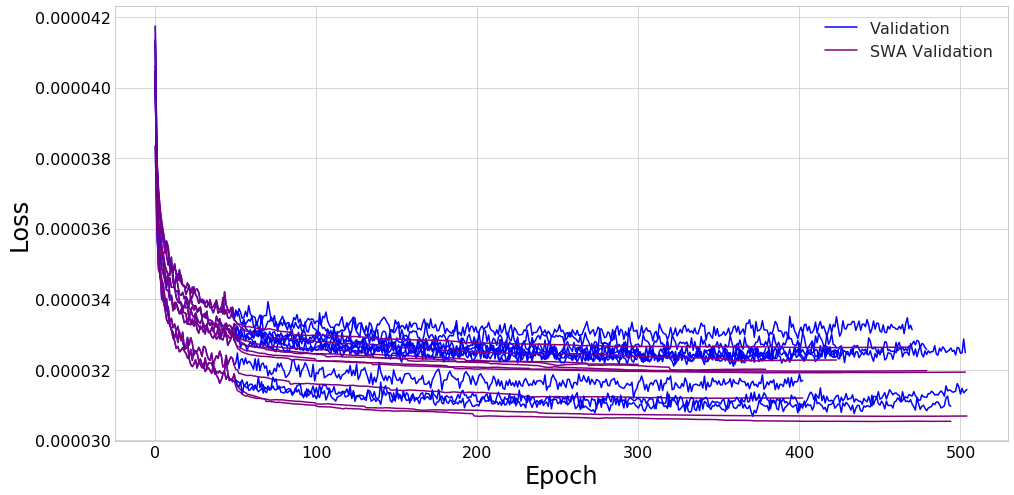

Mean loss = 3.17e-05 +- 2e-07
Mean wAUC = 0.0632 +- 0.0008
Mean AUC = 0.0989 +- 0.0009
Mean AMS = 3.95 +- 0.05
Mean cut = 0.964 +- 0.007
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          swaStart=50, swaRenewal=5, sgdReplacement=1,
                                          cosAnnealMult=1, plotLR=0, reduxDecay=0,
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.053331058981712e-05
Model 1 is 9 with loss = 3.068189141369528e-05
Model 2 is 3 with loss = 3.1192176637705414e-05
Model 3 is 0 with loss = 3.191603934678276e-05
Model 4 is 4 with loss = 3.192195162482676e-05
Model 5 is 1 with loss = 3.195949366870535e-05
Model 6 is 2 with loss = 3.1991830598938125e-05
Model 7 is 7 with loss = 3.212311424402431e-05
Model 8 is 5 with loss = 3.2253581870463675e-05
Model 9 is 8 with loss = 3.262811274514005e-05


## Response on validation data with TTA

In [10]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.013944842973910273s per sample

Predicting batch 2 out of 10
Prediction took 0.01206301429644227s per sample

Predicting batch 3 out of 10
Prediction took 0.01208672799114138s per sample

Predicting batch 4 out of 10
Prediction took 0.012066420266404749s per sample

Predicting batch 5 out of 10
Prediction took 0.012002467751316727s per sample

Predicting batch 6 out of 10
Prediction took 0.012121276593394577s per sample

Predicting batch 7 out of 10
Prediction took 0.0120877864908427s per sample

Predicting batch 8 out of 10
Prediction took 0.012058478222601116s per sample

Predicting batch 9 out of 10
Prediction took 0.012081994818150997s per sample

Predicting batch 10 out of 10
Prediction took 0.012120958459004759s per sample



In [12]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9029636896634965, weighted 0.9359613931008173


In [13]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.968504122085453, 0.9590988)

In [14]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.961+-0.01
Exact mean cut 0.960919622448273, corresponds to AMS of 3.9088194357570303
CPU times: user 2.59 s, sys: 14.7 s, total: 17.3 s
Wall time: 2min 9s


(4.0, 0.961)

# Test scoring

In [15]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [16]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.011933014150268652s per sample

Predicting batch 2 out of 10
Prediction took 0.011945609294250608s per sample

Predicting batch 3 out of 10
Prediction took 0.011974056871269238s per sample

Predicting batch 4 out of 10
Prediction took 0.011906635228730738s per sample

Predicting batch 5 out of 10
Prediction took 0.012017901679263874s per sample

Predicting batch 6 out of 10
Prediction took 0.012037463519840755s per sample

Predicting batch 7 out of 10
Prediction took 0.012061716432293708s per sample

Predicting batch 8 out of 10
Prediction took 0.012067347062023526s per sample

Predicting batch 9 out of 10
Prediction took 0.012095476442372258s per sample

Predicting batch 10 out of 10
Prediction took 0.012074391241845759s per sample

CPU times: user 2h 54s, sys: 9min 29s, total: 2h 10min 24s
Wall time: 1h 50min 6s


In [17]:
scoreTestOD(testData.source, 0.960919622448273)

Public:Private AMS: 3.689264018580268 : 3.763038655750038


(3.689264018580268, 3.763038655750038)

# Save/Load

In [18]:
name = "weights/Swish_SWA_Replacement_WithCLR"

In [19]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)